# <font color="red"> Regression - Rakam Tahminleme</font>

In [22]:
import pandas as pd # veileri okuma paketi
import matplotlib.pyplot as plt   #grafikler için
 

In [2]:
df=pd.read_excel("cars.xls")

# EDA

In [3]:
df.head() #ilk beş satır

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
 df.tail()  #son beş satır

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
803,13585.636802,35662,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0


In [5]:
df.info() #hangi sütunun hangi verilerden oluştuğunu gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [6]:
df.describe() #tüm sütunların istatistiğini verir

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [7]:
df.corr() #korelasyon  (arabanın km arttıkça fiyat düşer tabloda eksi çıkan değerler bu ters orantıyı anlatmaktadır.)

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [8]:
df.shape #dosyanın kaç satır ve sütundan oluştuğunu gösterir satırXsütun sayısı

(804, 12)

In [9]:
df["Make"].unique() #araç markaları

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [10]:
df["Make"].nunique() #sayısını verir

6

In [11]:
df["Make"].value_counts() #hangi markadan kaç tane

Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: Make, dtype: int64

In [16]:
df["Make"].value_counts(normalize=True)*100 #araç marka yüzde oranları

Chevrolet    39.800995
Pontiac      18.656716
SAAB         14.179104
Buick         9.950249
Cadillac      9.950249
Saturn        7.462687
Name: Make, dtype: float64

In [13]:
import seaborn as sns 

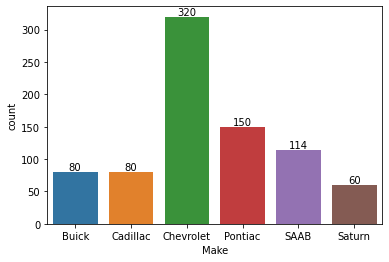

In [18]:
ax=sns.countplot(x=df["Make"]);
ax.bar_label(ax.containers[0]);  #barların üzerine rakmları 

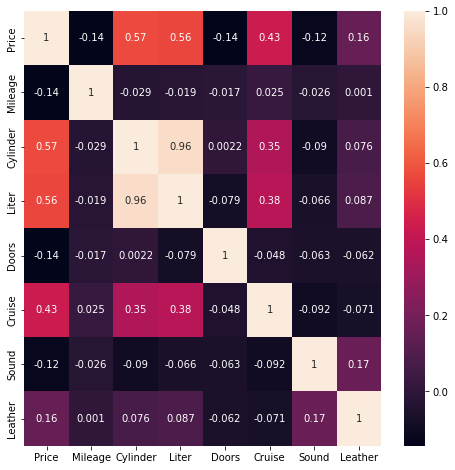

In [23]:
plt.figure(figsize=(8,8)); #grafik boyutu ayarı boyutlandırma 8*8 
sns.heatmap(df.corr(),annot=True); 

In [26]:
abs(df.corr()['Price'].sort_values(ascending=False))  # fiyatın diğer sütunlara göre korelasyonunu büyükten küçüğe hesaplama

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [29]:
df["Doors"].value_counts()  #Kapı sayıları

4    614
2    190
Name: Doors, dtype: int64

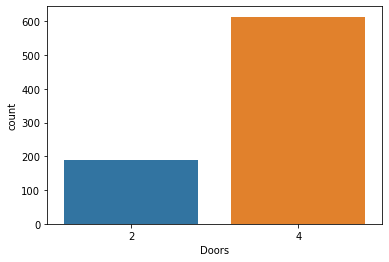

In [30]:
sns.countplot(x=df["Doors"]);

# Feature Engineering

In [31]:
df.isnull().sum() #boş veri var mı yok mu?

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

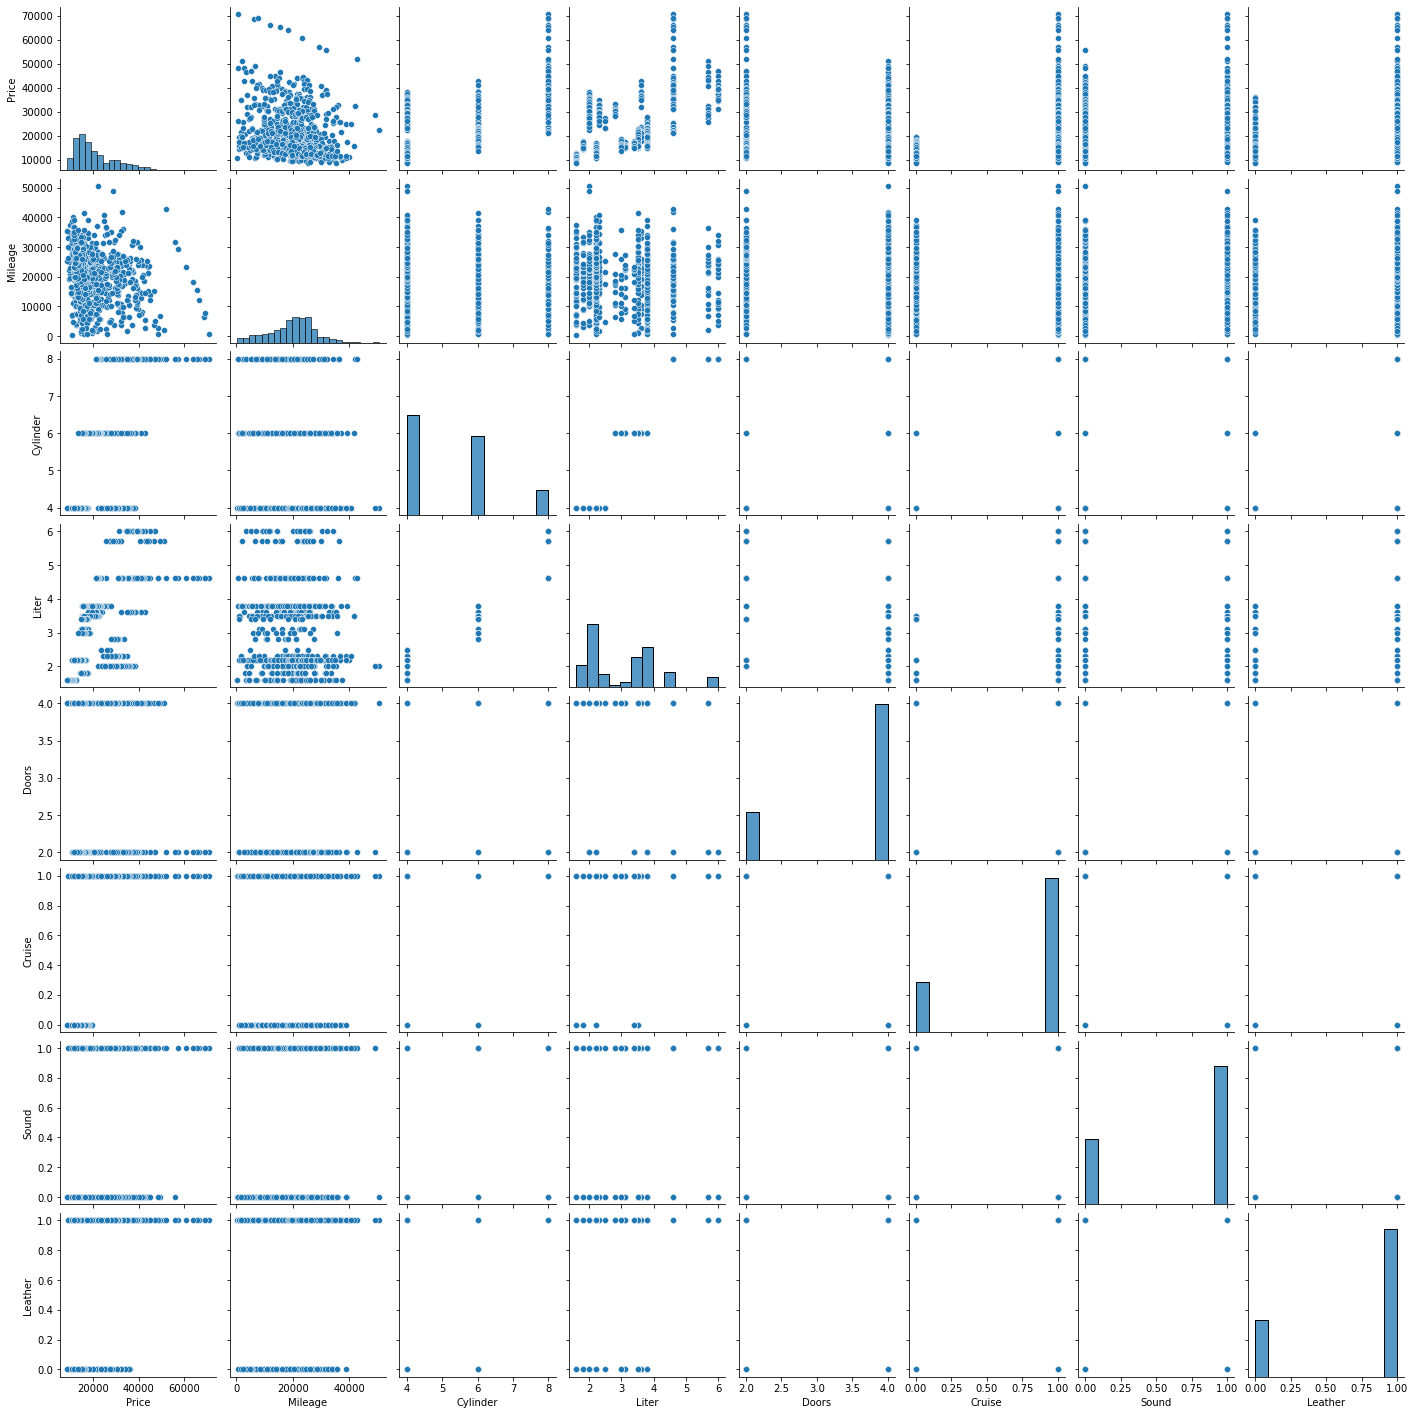

In [32]:
sns.pairplot(df); #tüm sütunların diğer sütunlara göre dağılımları

### Modelling

In [35]:
x=df[["Mileage","Cylinder","Liter","Cruise"]] #bu dataları tanımlıyoruz
y=df["Price"]   #ikinci değişkende ise x değişkende ki verilere göre aracın fiyatını tahmin etmeye çalışıyoruz.

In [36]:
x

,Mileage,Cylinder,Liter,Cruise
0,8221,6,3.1,1
1,9135,6,3.1,1
2,13196,6,3.1,1
3,16342,6,3.1,1
4,19832,6,3.1,1
...,...,...,...,...
799,16229,6,3.0,1
800,19095,6,3.0,1
801,20484,6,3.0,1
802,25979,6,3.0,1


In [37]:
y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
#Seed

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) #%20 test için ayırır
#random_state=42 random vei üretirken 42 den başlatır ve aynı rakamları üretir bu şekilde tam öğrenir. test_size datanın %20 sini teste ayırır

In [40]:
x_train.shape,x_test.shape  #kacı test satırı kaçı model satırı

((643, 4), (161, 4))

In [41]:
from sklearn.linear_model import LinearRegression  

In [42]:
lr=LinearRegression()

In [43]:
model=lr.fit(x_train,y_train) #modeli eğitiyoruz eğitiyoruz. Modeli eğitmek için fit parametresini kullan

In [44]:
tahmin=model.predict(x_test)  #modeli test ediyoruz   predict ile test verisindekileri tahmin ediyoruz. Eğitilen modelle kenara saklanan veileri tahmin ederiz

In [46]:
from sklearn.metrics import r2_score, mean_squared_error 

In [47]:
(mean_squared_error(tahmin,y_test))**0.5

7413.255792158802

In [48]:
r2_score(tahmin,y_test) #yanlış tahmin ve eksi değer döndü BAŞARISIZ

-0.3671260571211763

### Sayısal ifadeler ile text ifadelerin korelasyonunun hesaplanması arasında ilşkinin kurulması

In [49]:
x=df[["Mileage","Cylinder","Liter","Cruise","Make","Trim"]] #bu dataları tanımlıyoruz. Daha sonradan "Make","Trim" datalarını ekledik. Markaya göre
y=df["Price"]

In [50]:
x

,Mileage,Cylinder,Liter,Cruise,Make,Trim
0,8221,6,3.1,1,Buick,Sedan 4D
1,9135,6,3.1,1,Buick,Sedan 4D
2,13196,6,3.1,1,Buick,Sedan 4D
3,16342,6,3.1,1,Buick,Sedan 4D
4,19832,6,3.1,1,Buick,Sedan 4D
...,...,...,...,...,...,...
799,16229,6,3.0,1,Saturn,L300 Sedan 4D
800,19095,6,3.0,1,Saturn,L300 Sedan 4D
801,20484,6,3.0,1,Saturn,L300 Sedan 4D
802,25979,6,3.0,1,Saturn,L300 Sedan 4D


In [52]:
x=pd.get_dummies(x,drop_first=True) #yeni sütunlar oluşturuldu. Excel de oluşturduğumuz text ifadelerin matrislerini otomatik oluşturup tablo içerisinde yeni sütunlar olarak oluşturduk

In [53]:
x

,Mileage,Cylinder,Liter,Cruise,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Trim_Aero Conv 2D,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,8221,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9135,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13196,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16342,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,19832,6,3.1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16229,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
800,19095,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
801,20484,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
802,25979,6,3.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42) #eğitim ve test datalarını belirle

In [55]:
model=lr.fit(x_train,y_train)  #model e eğitim datasını ve

In [56]:
tahmin=model.predict(x_test) #tahmin değişkenine test üzeride ki veriyi ve

In [57]:
(mean_squared_error(tahmin,y_test))**0.5   #

1523.6314728711307

In [58]:
r2_score(tahmin,y_test)   # %97 oranla araç fiyatlarını doğru tahmin ettik. Başarı oranı -0.37 den %97 ye çıktı BAŞARILI

0.9717252793475158

In [59]:
from sklearn.linear_model import Ridge, Lasso #regrasyon modellerini import ediyoruz çıkan sonuçları test etmek için

In [60]:
R=Ridge()  #Ridge ve lasso paketlerini R ve L değişkenlerine atadık
L=Lasso()

In [62]:
R.fit(x_train,y_train)  

Ridge()

In [63]:
tahmin2=R.predict(x_test)

In [65]:
(mean_squared_error(tahmin2,y_test))**0.5
r2_score(tahmin2,y_test)

0.9684687553754917

In [66]:
L.fit(x_train,y_train)

Lasso()

In [67]:
tahmin3=L.predict(x_test)

In [68]:
(mean_squared_error(tahmin3,y_test))**0.5
r2_score(tahmin3,y_test)   

0.9712425418609402

In [69]:
#SONUÇ BAŞARILI

In [70]:
from sklearn.linear_model import ElasticNet  #Rich ve Lassonun karışımını verir

In [76]:
E= ElasticNet(l1_ratio=0.8)  #%80 ini lasso dan alır

In [77]:
E.fit(x_train,y_train)  

ElasticNet(l1_ratio=0.8)

In [80]:
tahmin4=E.predict(x_test)

In [81]:
r2_score(tahmin4,y_test) 

0.39718993519691126